# Does including "Free" in the app name make a difference? A statistical analysis

## Inroduction

The word "FREE" usually is used to attract new customers to new or current product as part of marketing campaigns, because "FREE" draws customers eyes to where the businesses want them to go. But, is this theory works in the app market where most of the apps available on Google Play store or Apple Appstore are free. Some argue adding the word "FREE" to the app name attract customers in the mobile app market as well, while others think it lost its magic on customers eyes since developers are more tend to create free apps and generate income from attracting customers to buy pro versions or upgrades while using the app.

In this analysis, we have a sample of web scraped data by Lavanya Gupta of 10k Play store apps. The data will be used to analyze the effect of using the word "FREE" in the app name (title) by evaluating customers review rating, number of customer reviews and total number of app installs.

## Dataset

The data in this analysis consist of applications details and metrics of 10,841 app. The dataset consist of 13 columns as following:

1- App: Application name - title

2- Category: The apps are divided into 34 categories

3- Rating: Overall customer rating of the app

4- Reviews: Number of customers reviews for the app

5- Size: Size of the app 

6- Installs: Number of customer downloads/installs for the app

7- Type: type of the app (Paid or Free)

8- Price: Price of the app (for paid apps only)

9- Content Rating: Age group the app is targeted at (80% of the apps are targeting everyone)

10- Genres: There are 118 genres and apps can belong to multiple genres apart of its main category

11- Last Updated: Dates when the app was last updated on Play store

12- Current Ver: the current version of the app available on Play store

13- Android Ver: Minimum required Android version

you can find bellow the first five rows of the dataset for illustration. The total number of lines is 10,841 line as it shows below.

In [491]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
play_store = pd.read_csv('C:/Users/rabia/Desktop/Thinkful/Capstone project 1/googleplaystore.csv')
play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [492]:
len(play_store)

10841

We need to check the data and clean it of any duplication or wrong entries. For example some apps have been presented in the dataset more than once under different categories like “Coloring book moana” app which is available twice in the dataset under "Family" and "Art and Design" categories

In [476]:
play_store.loc[(play_store['App'] == 'Coloring book moana')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2033,Coloring book moana,FAMILY,3.9,974,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In the process of the data cleaning, we need to remove wrong entries such as category "1.9" with an average rating of "19.0" which is certainly a wrong entry

In [477]:
play_store.loc[(play_store['Category'] == '1.9')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


The lines of code below is used to first sort the values under "App" column and then remove any duplicate under the same column. The last line oif code is to remove any rows with a column value of "1.9"

In [493]:
play_store.sort_values('App', inplace = True)
play_store.drop_duplicates(subset = 'App', keep = False, inplace = True)
play_store=play_store[~play_store['Category'].str.contains('1.9')]

For the purpose of analysis and plotting, we need to be sure that columns "Rating", "Reviews", and "Installs" are digits. As shown below, only the "Rating" column values are digits, while "Reviews" and "Installs" values need to be converted to digit type

In [494]:
play_store.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In order to convert the "Rating" column values to digits we need to replace all values with the value "NaN" with "0" because it is not possible to convert "NaN" to digit

In [504]:
play_store[pd.isnull(play_store['Rating'])].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,NaN,27,3.6M,500+,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
2483,14thStreetVet,MEDICAL,NaN,0,29M,5+,Free,0,Everyone,Medical,"July 16, 2018",300000.1.11,4.0.3 and up
7382,1st Fed CI Mobile Banking,FINANCE,NaN,0,31M,500+,Free,0,Everyone,Finance,"September 29, 2016",6.0.0.1775,4.1 and up
6518,2017 BN SM Sales Conference,BUSINESS,NaN,2,10M,100+,Free,0,Teen,Business,"September 28, 2017",v2.7.11.6,4.1 and up
9660,23rd QM BDE EO,BUSINESS,NaN,0,6.3M,10+,Free,0,Everyone,Business,"September 27, 2017",1.0.0,4.1 and up


In [505]:
play_store['Rating'].fillna(0, inplace=True)

The below lines of codes are used to change all values under "Rating" column to "Floats" and all the values under "Reviews" column to Integers

In [507]:
play_store.Rating = play_store.Rating.astype(float)
play_store.Reviews = play_store.Reviews.astype(int)

The values under "Installs" column are strings and categorical. for the purpose of sorting them for plotting purposes we created a new column with the name "installs_numeric" and removed the "+" and "," from "Installs" column values, then converted them to integers under the new column.

In [513]:
play_store['installs_numeric'] = pd.to_numeric(play_store['Installs'].str.replace('+','').str.replace(',','')
                                 , errors='ignore')
play_store.installs_numeric = play_store.installs_numeric.astype(int)

Finally, we have "Reviews" and "installs_numeric" columns values as integers, and the "Rating" column as Float. the total number of rows in the data frame is 8,846 rows. This means that the total number of apps under this study has been reduced from 10,841 to 8,846 apps

In [516]:
play_store.dtypes

App                  object
Category             object
Rating              float64
Reviews               int32
Size                 object
Installs             object
Type                 object
Price                object
Content Rating       object
Genres               object
Last Updated         object
Current Ver          object
Android Ver          object
installs_numeric      int32
dtype: object

In [517]:
len(play_store)

8846

## Data Visulization

In this section we will explore the data and find out the data insights and provide comments and findings (if applicable).

First, we will explore the number of apps per each category and check which categoies are more or less represented compare to the others

We have grouped the apps by category, and plotted the count of the values (apps) per each category is it shown below

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.]),
 <a list of 9 Text yticklabel objects>)

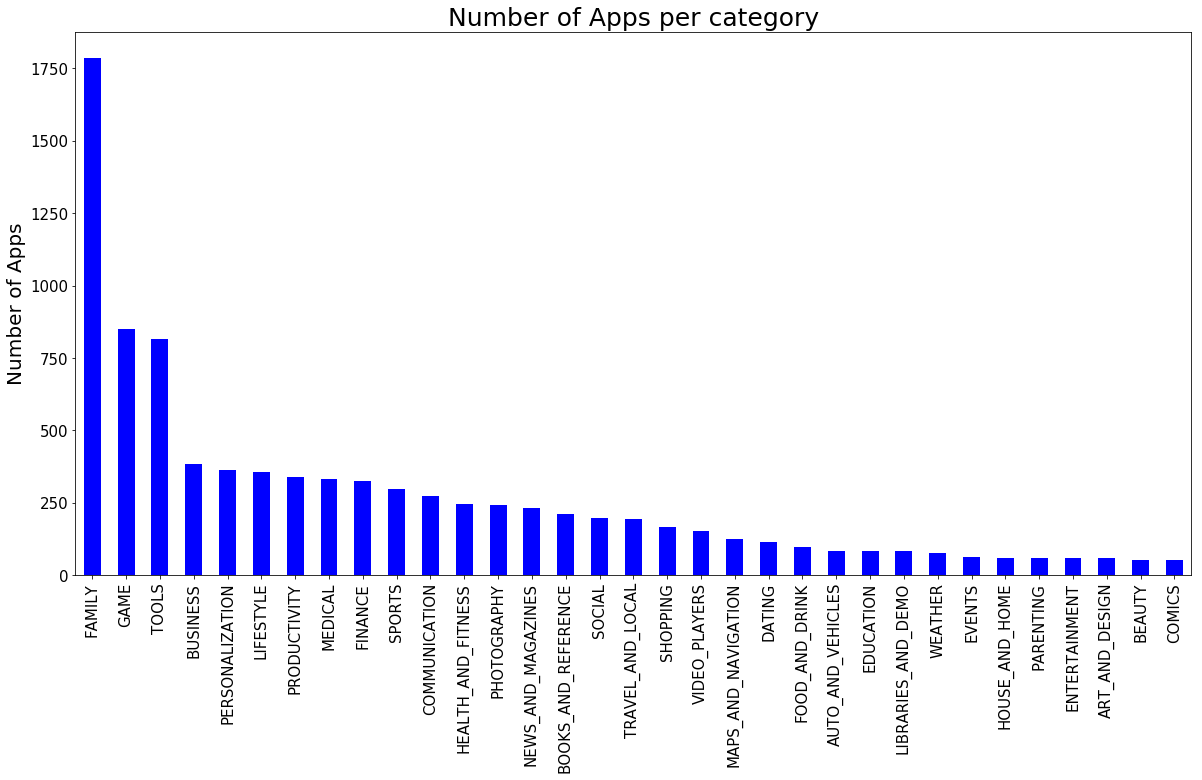

In [521]:
play_store_category = play_store.groupby('Category').mean()
plt.figure(figsize=(20,10))
play_store.Category.value_counts().plot(kind='bar', color = 'blue')
plt.ylabel('Number of Apps', fontsize = 20)
plt.title('Number of Apps per category', fontsize = 25)
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')

As we can see in the above barchart, "Family" category is the most represnted category in our data frame by aproximately (20%). "Game" and "Tools" categories are well represented as well compare to the rest of the apps

Second, we are going to check the distribution of customers ratings of the apps. Over 1,400 apps did not receive a rating for the customers. If we ignore these 1,400 apps, the distribution of the customers rating is skewed to the left. most of the apps received more than 4.0 rating score. You can see the bar chart for the rating count below: 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text xticklabel objects>)

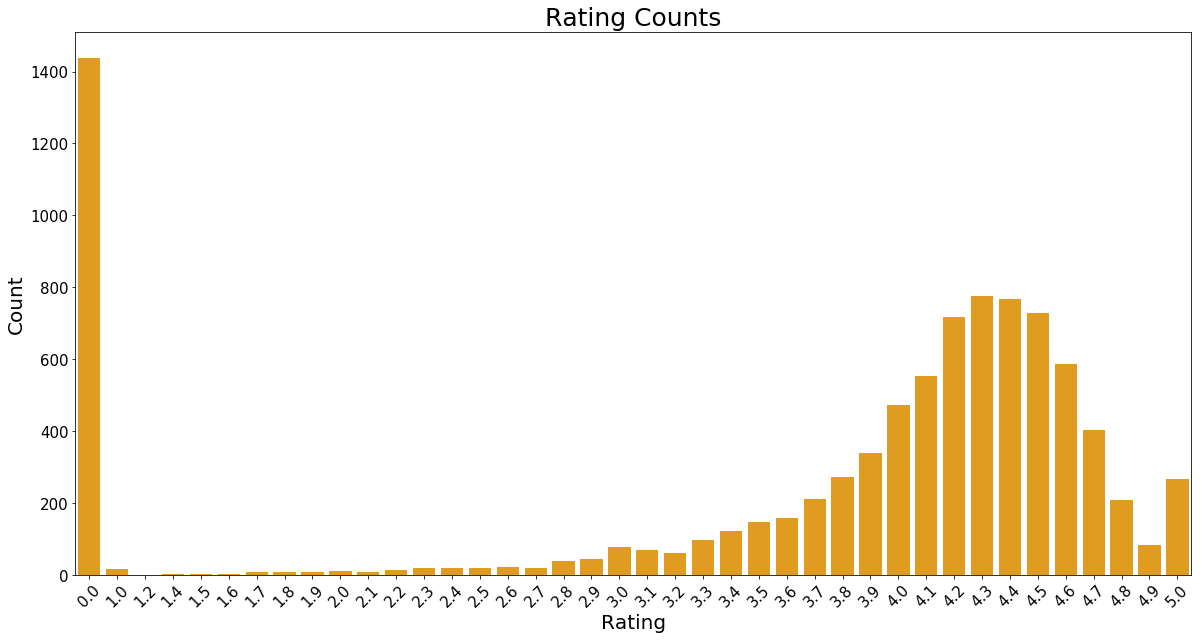

In [522]:
plt.figure(figsize=(20,10))
rating_count = sns.countplot(x="Rating", data=play_store, color= 'orange')
rating_count.axes.set_title("Rating Counts",fontsize=25)
rating_count.set_xlabel("Rating",fontsize=20)
rating_count.set_ylabel("Count",fontsize=20)
rating_count.tick_params(labelsize=15)
plt.xticks(rotation=45)

The average rating does not defer much between most of the categories as it appears in the bar chart below. "Business", "Dating" and "Medical:" apps received a relatively low average rating if it compared to highly rated apps such as "Education" and "Art and Design" apps. The average rating for each category apps is represented in the y-axes of the bar chart below.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

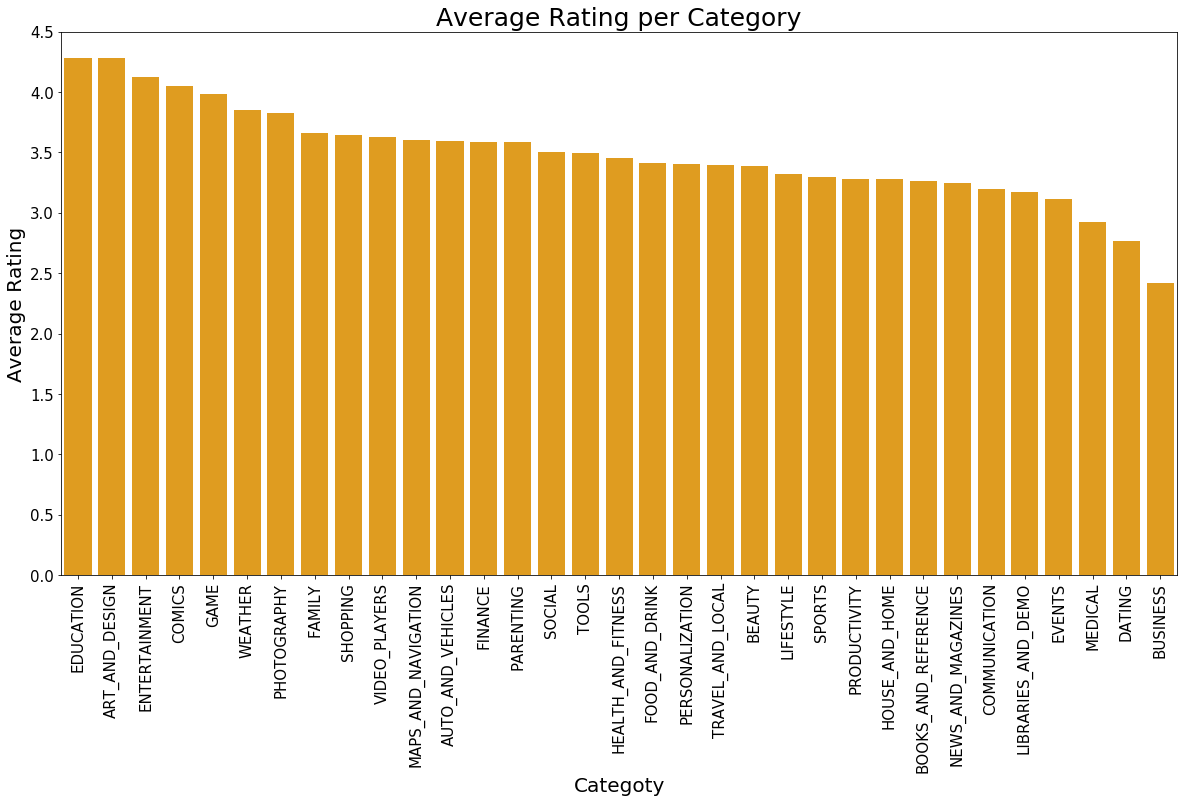

In [523]:
play_store_category = play_store.groupby('Category').mean().sort_values(('Rating'), ascending=False)
plt.figure(figsize=(20,10))
avg_sent_pol = sns.barplot(x=play_store_category.index, y=play_store_category.Rating, data=play_store_category, color ='orange')
avg_sent_pol.axes.set_title("Average Rating per Category",fontsize=25)
avg_sent_pol.set_xlabel("Categoty",fontsize=20)
avg_sent_pol.set_ylabel("Average Rating",fontsize=20)
avg_sent_pol.tick_params(labelsize=15)
plt.xticks(rotation=90)

Third, we would like to check the distribution of the number of installs of the apps. We have grouped the data frame by the number of installs "installs_numeric". The new data frame "play_store_installs" is shown below:

In [524]:
play_store_installs = play_store.groupby('installs_numeric').mean()
play_store_installs

,Rating,Reviews
installs_numeric,,
1,0.223881,2.985075e-01
5,0.506098,5.365854e-01
10,0.830990,1.091146e+00
50,1.219212,2.394089e+00
100,1.848930,5.455064e+00
500,2.525460,1.224233e+01
1000,3.178136,3.702186e+01
5000,3.652928,9.897397e+01
10000,3.853816,3.458325e+02


The count plot of the number of installs is shown below. Most of the apps has been installed between 100 and 50,000,000 times.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

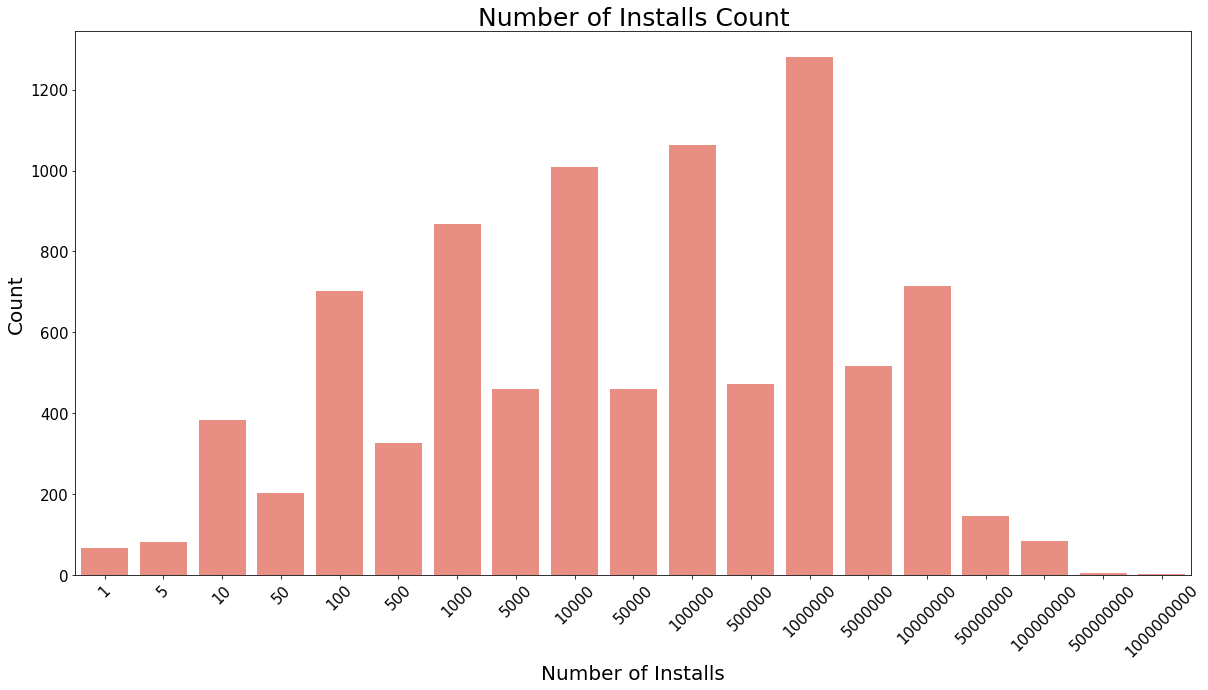

In [525]:
plt.figure(figsize=(20,10))
installs_numeric_count = sns.countplot(x="installs_numeric", data=play_store, color= 'salmon')
installs_numeric_count.axes.set_title("Number of Installs Count",fontsize=25)
installs_numeric_count.set_xlabel("Number of Installs",fontsize=20)
installs_numeric_count.set_ylabel("Count",fontsize=20)
installs_numeric_count.tick_params(labelsize=15)
plt.xticks(rotation=45)

The average rating increases as the number of installs increases as it shows in the below bar chart between number of installs and the average customers rating. This looks logical because a high number of installs usually is a representation of a successful app and successful apps usually receive high and positive customers rating.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

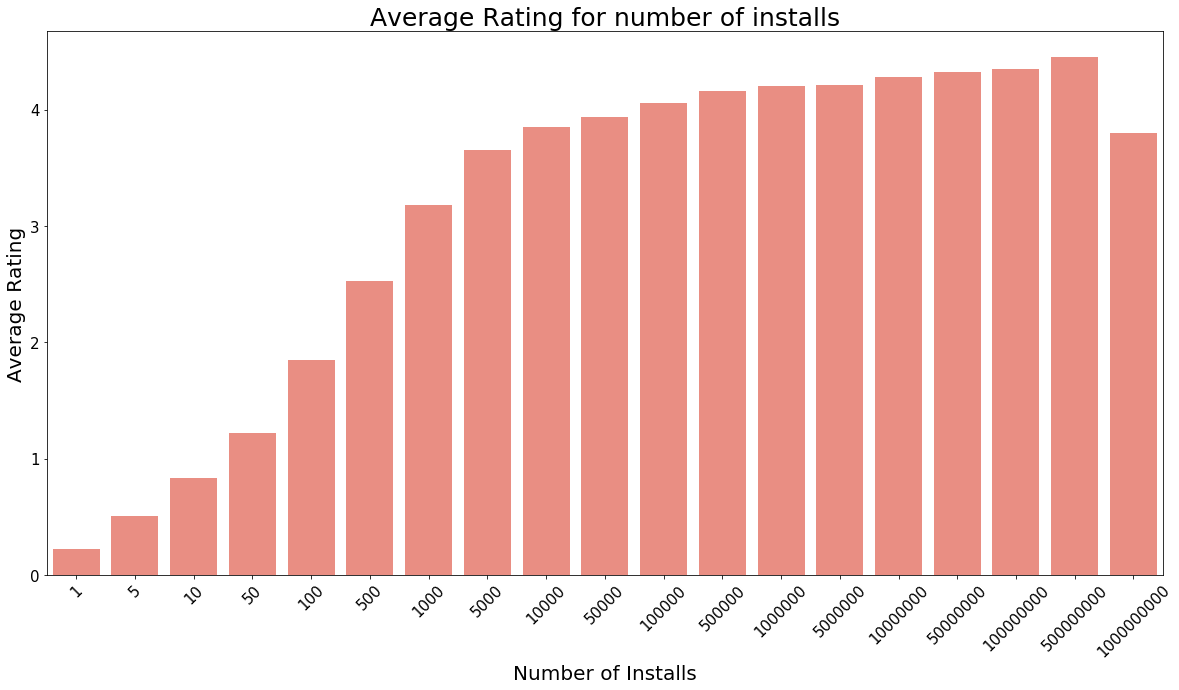

In [526]:
plt.figure(figsize=(20,10))
installs_rating = sns.barplot(x=play_store_installs.index, y=play_store_installs.Rating, data=play_store_installs, color ='salmon')
installs_rating.axes.set_title("Average Rating for number of installs",fontsize=25)
installs_rating.set_xlabel("Number of Installs",fontsize=20)
installs_rating.set_ylabel("Average Rating",fontsize=20)
installs_rating.tick_params(labelsize=15)
plt.xticks(rotation=45)

## Analaysis

Most of the apps in this data frame are "Free" apps (approx. more than 90%), while fee apps are "Paid" apps. This is clearly represented in the below bar chart which shows the apps count of "Free" and "Paid" apps

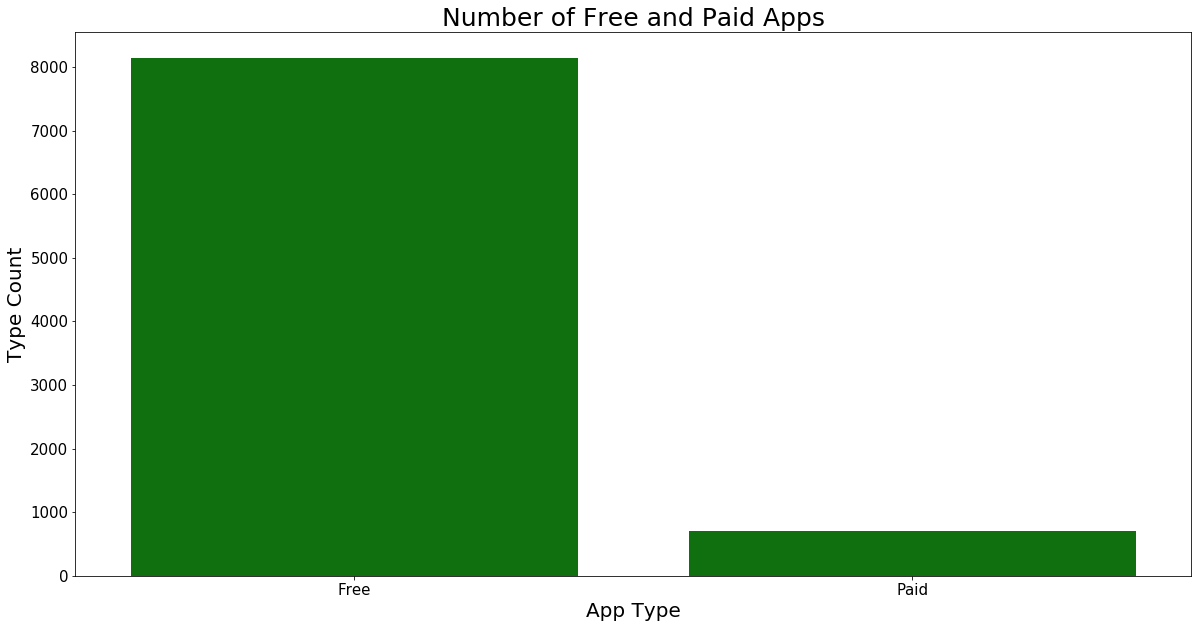

In [527]:
plt.figure(figsize=(20,10))
rating_count = sns.countplot(x="Type", data=play_store, color= 'green')
rating_count.axes.set_title("Number of Free and Paid Apps" ,fontsize=25)
rating_count.set_xlabel("App Type",fontsize=20)
rating_count.set_ylabel("Type Count",fontsize=20)
rating_count.tick_params(labelsize=15)

To evaluate the effect of including the word "FREE" in the app name (title), We have divided the data frame into two data frames. One for the apps contains the word "FREE" in the app name(title) and the other dataset will retain the remaining apps.

The below lines of codes are used to create two data frames. one for all the apps that include the word "FREE" in the app name, the option case=False make sure we include all apps contain the word "FREE" regardless if its upper- or lower-case word. the other data frame is using similar code line, but it includes the symbol "~" which change the output to show the opposite of the output of the first data frame.

In [530]:
free_app_name=play_store[play_store['App'].str.contains('free', case=False)] 
free_app_name.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,installs_numeric
324,- Free Comics - Comic Apps,COMICS,3.5,115,9.1M,"10,000+",Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up,10000
4875,30 Day Ab Challenge FREE,HEALTH_AND_FITNESS,4.3,48253,Varies with device,"1,000,000+",Free,0,Everyone,Health & Fitness,"December 13, 2017",Varies with device,Varies with device,1000000
4568,"360 Security - Free Antivirus, Booster, Cleaner",TOOLS,4.6,16771865,Varies with device,"100,000,000+",Free,0,Everyone,Tools,"August 4, 2018",Varies with device,Varies with device,100000000
5076,50000 Free eBooks & Free AudioBooks,BOOKS_AND_REFERENCE,4.1,52312,11M,"5,000,000+",Free,0,Teen,Books & Reference,"May 19, 2018",5.3.4,4.4 and up,5000000
729,ABC Preschool Free,EDUCATION,3.8,27572,25M,"5,000,000+",Free,0,Everyone,Education;Education,"October 25, 2017",3.0,2.3 and up,5000000


In [531]:
no_free_app_name=play_store[~play_store['App'].str.contains('free', case=False)]
no_free_app_name.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,installs_numeric
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,0.0,27,3.6M,500+,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up,500
8532,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22M,"1,000,000+",Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up,1000000
4541,.R,TOOLS,4.5,259,203k,"10,000+",Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up,10000
4636,/u/app,COMMUNICATION,4.7,573,53M,"10,000+",Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up,10000
5940,058.ba,NEWS_AND_MAGAZINES,4.4,27,14M,100+,Free,0,Everyone,News & Magazines,"July 6, 2018",1.0,4.2 and up,100


367 of the apps include the word "FREE" in the app name dspite over 90% of the apps included in this analysis were Free apps

In [532]:
len(free_app_name)

367

In [533]:
len(no_free_app_name)

8479

### Number of Installs

First, we plot number of installs count between the data frame of the apps which include the "FREE" word in the app name and the data frame which include the rest of the apps (Does include the word "FREE" in the app names)

As we can see below the distribution of the number of installs count does not defer between both data frames. Both of them are skewed to the left.

The average number of installs is higher for the apps that include the word "FREE" in the app name (4.26 million installs) compare to an average of 3.49 million installs for the rest of the apps. The standard deviation is less for the apps that include "Free" on their names compare to the rest of the apps which means it is more clustered


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

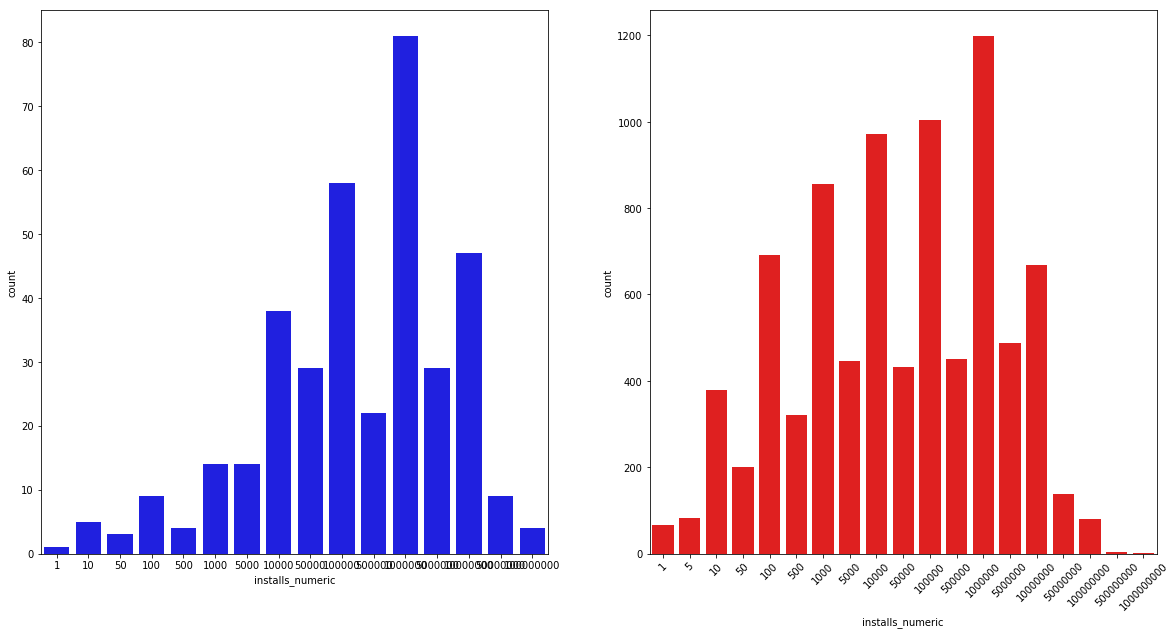

In [550]:
fig, ax =plt.subplots(1, 2, figsize=(20,10))
sns.countplot(free_app_name["installs_numeric"], color= 'blue', ax=ax[0])
plt.xticks(rotation=45)
sns.countplot(no_free_app_name["installs_numeric"], color= 'red', ax=ax[1])
plt.xticks(rotation=45)

In [535]:
free_app_name["installs_numeric"].describe()

count    3.670000e+02
mean     4.263534e+06
std      1.294597e+07
min      1.000000e+00
25%      5.000000e+04
50%      5.000000e+05
75%      1.000000e+06
max      1.000000e+08
Name: installs_numeric, dtype: float64

In [536]:
no_free_app_name["installs_numeric"].describe()

count    8.479000e+03
mean     3.487928e+06
std      2.205032e+07
min      1.000000e+00
25%      1.000000e+03
50%      5.000000e+04
75%      1.000000e+06
max      1.000000e+09
Name: installs_numeric, dtype: float64

### Customers Rating

Second, we plot distribution plots for the two data frames to evaluate any difference between them in terms of customers rating. the first plot compares between the both distributions as they adjacent to each other, while the second plot is combining both distribution in the same plot.

The plots show a higher average rating for the apps contain the word "FREE" in the app name (4.04) compare to an average score of (3.46) for the rest of apps. The distribution of the data frame of the apps include the word "FREE" in the app name is less spread out and more clustered (standard deviation = 0.93) compare to the rest of the apps (standard deviation = 1.63)

There are significant number of apps with a zero-rating score which represent (NaN - no customer rating). the number of apps with zero rating score is significantly higher with the apps which does not include the word "FREE" in the app name

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 <a list of 8 Text xticklabel objects>)

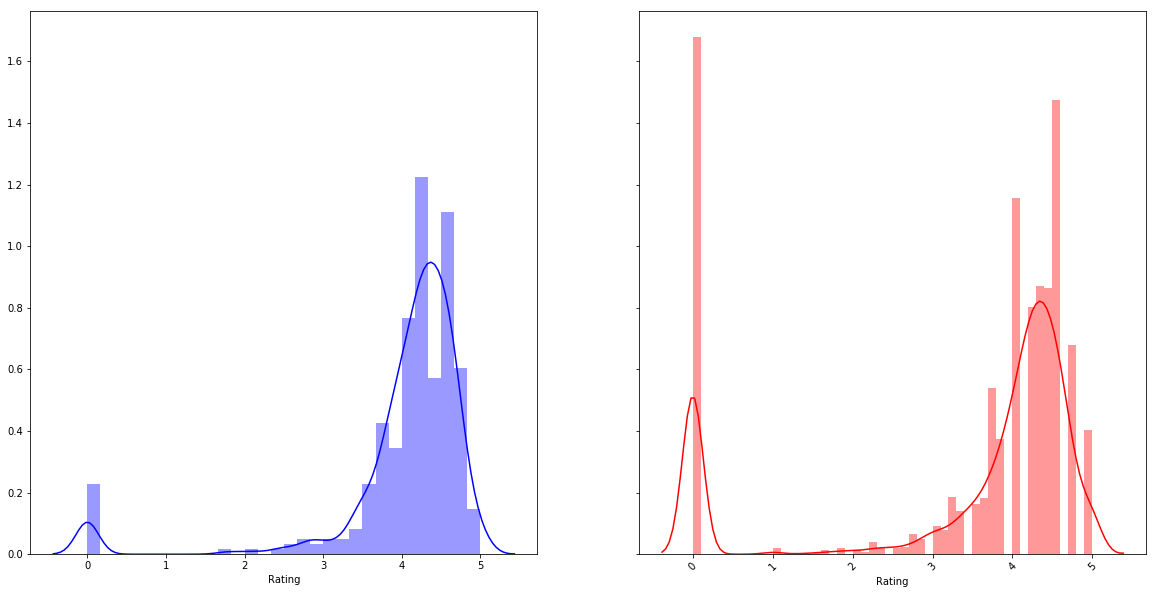

In [541]:
fig, ax =plt.subplots(1, 2, figsize=(20,10), sharey=True)
sns.distplot(free_app_name["Rating"], color= 'blue', ax=ax[0])
sns.distplot(no_free_app_name["Rating"], color= 'red', ax=ax[1])
plt.xticks(rotation=45)

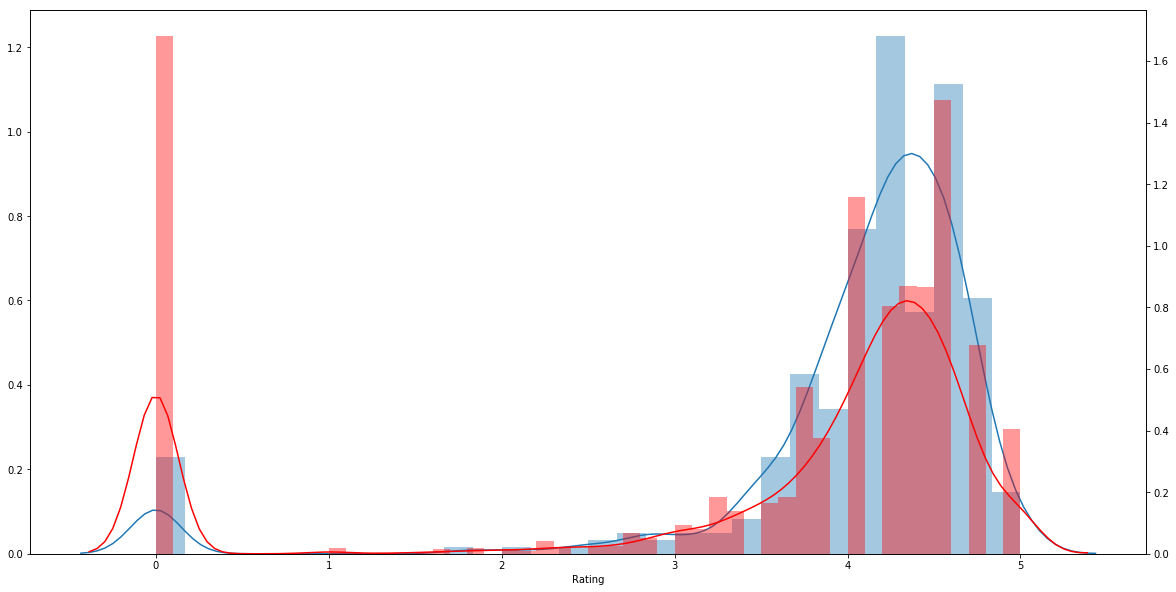

In [551]:
fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(free_app_name["Rating"], ax=ax)
ax2 = ax.twinx()
sns.distplot(no_free_app_name["Rating"], ax=ax2, color='red')

In [543]:
free_app_name["Rating"].describe()

count    367.000000
mean       4.040599
std        0.929341
min        0.000000
25%        3.900000
50%        4.300000
75%        4.500000
max        5.000000
Name: Rating, dtype: float64

In [544]:
no_free_app_name["Rating"].describe()

count    8479.000000
mean        3.458710
std         1.635402
min         0.000000
25%         3.500000
50%         4.200000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [555]:
play_store_zero=play_store.loc[play_store['Rating'] == 0]
free_app_name_zero=free_app_name.loc[free_app_name['Rating'] == 0]
no_free_app_name_zero=no_free_app_name.loc[no_free_app_name['Rating'] == 0]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

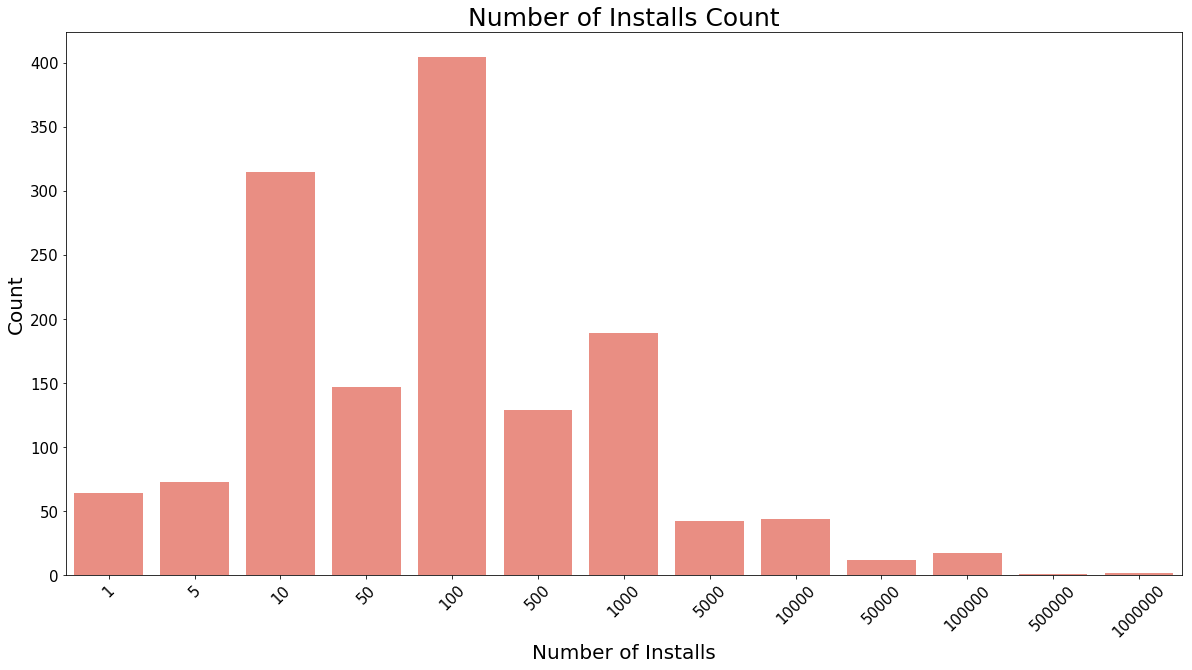

In [554]:
plt.figure(figsize=(20,10))
installs_numeric_count = sns.countplot(x="installs_numeric", data=play_store_zero, color= 'salmon')
installs_numeric_count.axes.set_title("Number of Installs Count",fontsize=25)
installs_numeric_count.set_xlabel("Number of Installs",fontsize=20)
installs_numeric_count.set_ylabel("Count",fontsize=20)
installs_numeric_count.tick_params(labelsize=15)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

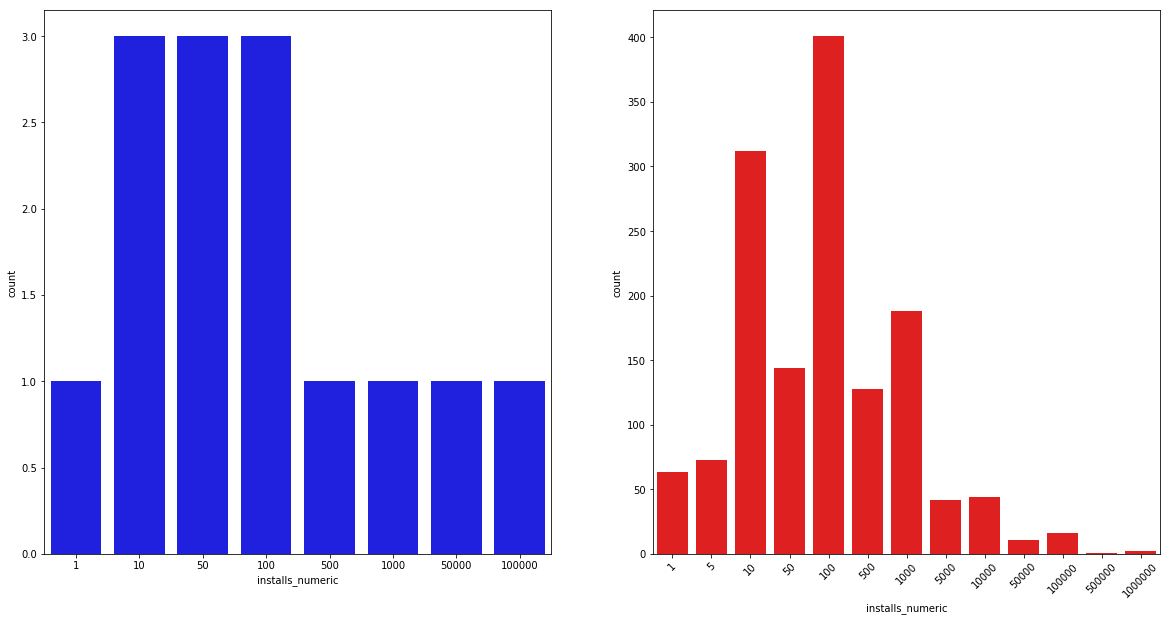

In [556]:
fig, ax =plt.subplots(1, 2, figsize=(20,10))
sns.countplot(free_app_name_zero["installs_numeric"], color= 'blue', ax=ax[0])
plt.xticks(rotation=45)
sns.countplot(no_free_app_name_zero["installs_numeric"], color= 'red', ax=ax[1])
plt.xticks(rotation=45)

(array([-10000000.,         0.,  10000000.,  20000000.,  30000000.,
         40000000.,  50000000.]), <a list of 7 Text xticklabel objects>)

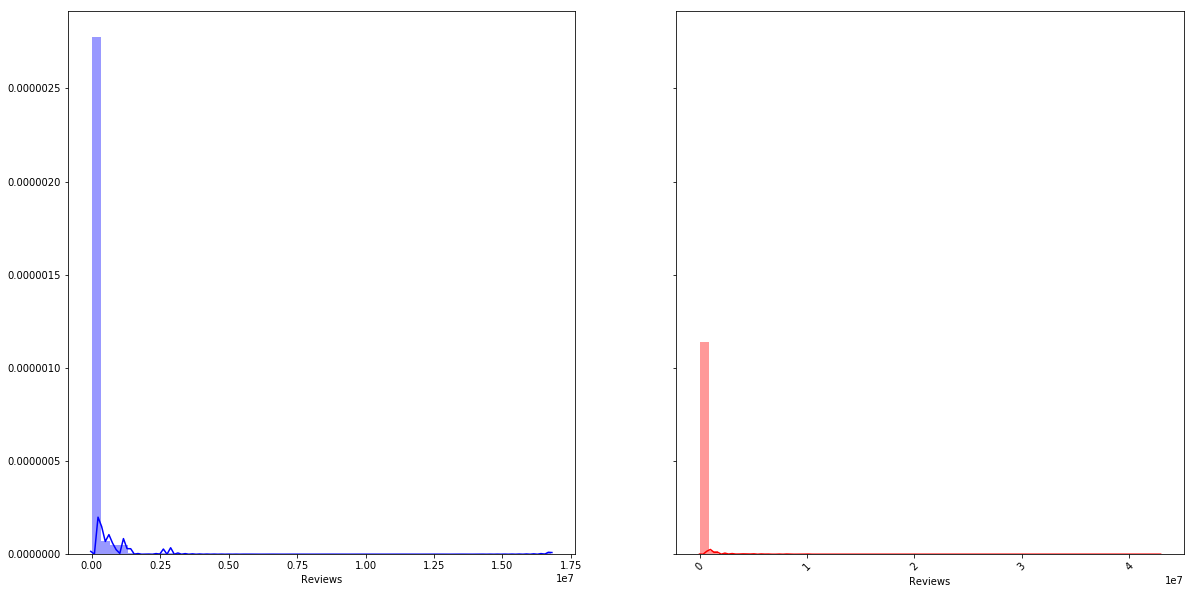

In [545]:
fig, ax =plt.subplots(1, 2, figsize=(20,10), sharey=True)
sns.distplot(free_app_name["Reviews"], color= 'blue', ax=ax[0])
sns.distplot(no_free_app_name["Reviews"], color= 'red', ax=ax[1])
plt.xticks(rotation=45)

In [423]:
free_app_name["Reviews"].describe()

count    5.260000e+02
mean     1.048594e+06
std      4.672774e+06
min      1.000000e+00
25%      1.321750e+03
50%      2.960050e+04
75%      2.967710e+05
max      5.664658e+07
Name: Reviews, dtype: float64

In [424]:
no_free_app_name["Reviews"].describe()

count    8.840000e+03
mean     4.822433e+05
std      3.026274e+06
min      1.000000e+00
25%      1.680000e+02
50%      5.314000e+03
75%      7.518900e+04
max      7.815831e+07
Name: Reviews, dtype: float64

The two distribution charts and the statistical describition of both datasets shows no significant difference between both datasets in terms of Number of customer reviews

## Conculsion 

Inclusion of word "FREE" in the app name or title has no change on the success of the app. It did no0t show any significant improvement in terms of number of installs/downloads. it also did not receive more reviews or gain higher customer satisfaction through higher review ratings.